In [21]:
# pip install panda

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, eig
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

In [23]:
ozone = pd.read_csv('ozone.csv')

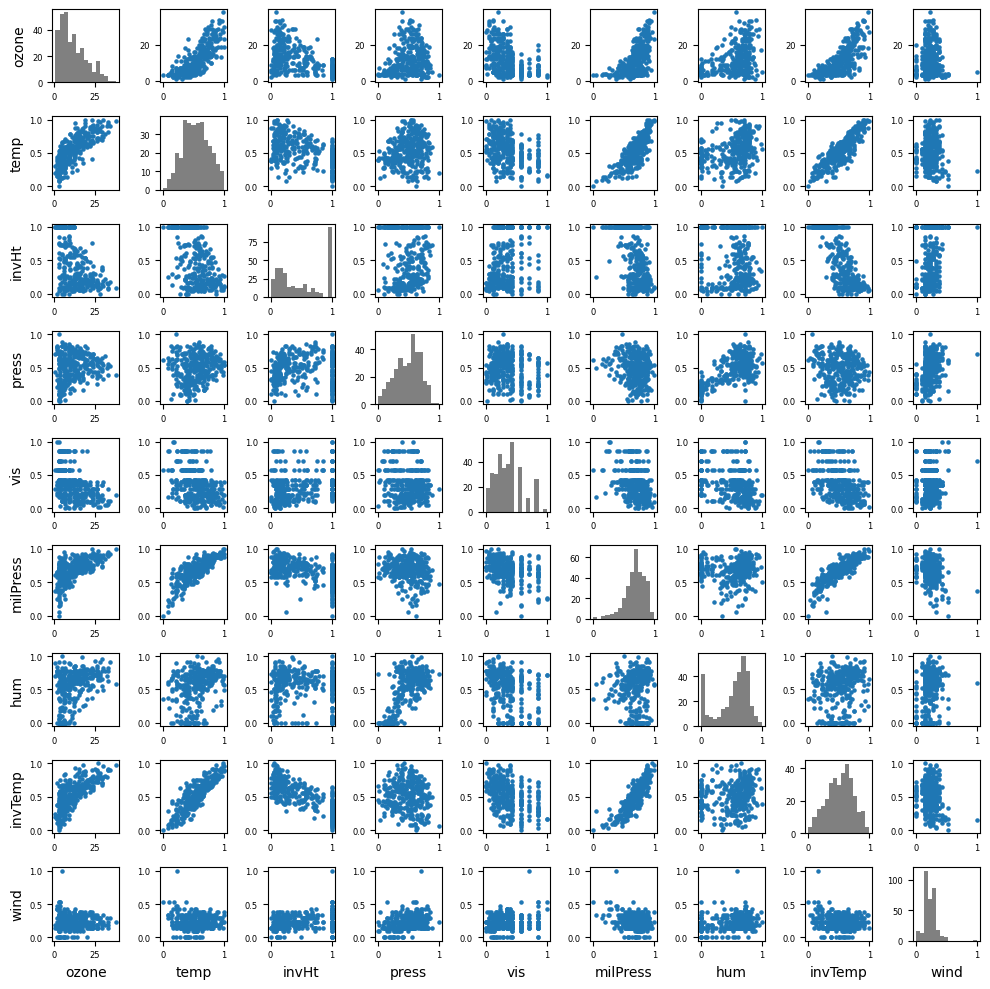

In [24]:
# Code that explores the data through scatterplots and histograms
# Number of variables
variables = ozone.columns
num_vars = len(variables)

# Create a figure and axis grid
fig, axes = plt.subplots(num_vars, num_vars, figsize=(10, 10))

# Generate plots
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        ax = axes[i, j]
        if i != j:
            ax.scatter(ozone[var2], ozone[var1], s=5)
        else:
            # For diagonal, display histogram
            ax.hist(ozone[var1], bins=15, color='gray')
        if i == num_vars - 1:
            ax.set_xlabel(var2)
        if j == 0:
            ax.set_ylabel(var1)
        ax.tick_params(axis='both', which='both', labelsize=6)

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
# Least squares using LinearRegression() in sklearn
X = ozone.drop(columns=['ozone']).to_numpy()
Y = ozone['ozone'].to_numpy()
model = LinearRegression()
model.fit(X,Y)

print("The coefficients are "+str(model.coef_)+".")
print("The intercept is "+str(model.intercept_)+".")

The coefficients are [18.62442678 -2.59796932  0.27655168 -2.28959718 -4.32642122  5.20736661
  9.08478611  1.41589211].
The intercept is -1.1681375424401264.


In [26]:
# Least squares using statsmodels
lsmodel = OLS(Y,X).fit()
lsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              372.3
Date:                Thu, 20 Feb 2025   Prob (F-statistic):                   1.02e-157
Time:                        15:59:50   Log-Likelihood:                         -960.67
No. Observations:                 330   AIC:                                      1937.
Df Residuals:                     322   BIC:                                      1968.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            19.5950      2.848      6.881      0.000      13.993      25.197
x2            -2.9858      1.171     -2.549      0.011      -5.290      -0.681
x3            -0.1444      1.814     -0.080      0.937      -3.713       3.424
x4            -2.5339      1.232     -2.057      0.040      -4.957      -0.111
x5            -4.9919      3.169     -1.575      0.116     -11.226       1.242
x6             5.0826      1.372      3.706      0.000       2.384       7.781
x7             7.8916      4.310      1.831      0.068      -0.587      16.370
x8             1.2124      2.543      0.477      0.634      -3.791       6.216
==============================================================================
Omnibus:                        2.513   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.404
Skew:                           0.209   Prob(JB):                        0.301
Kurtosis:                       3.011   Cond. No.                         31.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Directly calculating least squares

# Adding ones so that betahat includes intercept
aX = np.hstack([np.ones((X.shape[0], 1)), X])

# Estimated coefficients
betahat = inv(aX.T @ aX) @ (aX.T @ Y)

# Hat matrix
H = aX @ inv(aX.T @ aX) @ aX.T
eigenvalues = eig(H)[0]
# Round up to 12 decimals to account for numerical precision
np.round(eigenvalues[0:15], 12)

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j, -0.+0.j,
       -0.-0.j])

In [28]:
# Fitted data
Yhat = aX @ betahat
Yhat = H @ Y

# Compare to LinearRegression()
np.column_stack([betahat, np.concatenate(([model.intercept_], model.coef_))])

array([[-1.16813754, -1.16813754],
       [18.62442678, 18.62442678],
       [-2.59796932, -2.59796932],
       [ 0.27655168,  0.27655168],
       [-2.28959718, -2.28959718],
       [-4.32642122, -4.32642122],
       [ 5.20736661,  5.20736661],
       [ 9.08478611,  9.08478611],
       [ 1.41589211,  1.41589211]])